## Import Libary

In [ ]:
# Pemrosesan Data
import pandas as pd

# Visualisasi Data
import matplotlib.pyplot as plt

# Pemrosesan Teks dan Ekstraksi Fitur
from sklearn.feature_extraction.text import TfidfVectorizer

# Mengukur Kemiripan
from sklearn.metrics.pairwise import cosine_similarity

# Evaluasi Model
from sklearn.metrics import precision_score

# Operasi Numerik
import numpy as np

# Pengelolaan Dataset Kaggle
import kagglehub

## Mendowload Data

In [ ]:
# Download latest version
path = kagglehub.dataset_download("mohneesh7/indian-medicine-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/indian-medicine-data


## Data Understanding

In [ ]:
# Link atau path ke file dataset yang ada di lingkungan Kaggle
link = "/kaggle/input/indian-medicine-data/medicine_data.csv"

# Membaca file CSV dan menyimpannya ke dalam DataFrame
medicine = pd.read_csv(link)

# Menampilkan 10 baris pertama dari dataset
medicine.head(10)

,sub_category,product_name,salt_composition,product_price,product_manufactured,medicine_desc,side_effects,drug_interactions
0,Human Insulin Basal,Human Insulatard 40IU/ml Suspension for Injection,Insulin Isophane (40IU),₹133.93,Novo Nordisk India Pvt Ltd,Human Insulatard 40IU/ml Suspension for Inject...,"Hypoglycemia (low blood glucose level),Injecti...","{""drug"": [""Benazepril"", ""Captopril"", ""Enalapri..."
1,Human Insulin Basal,Insulin 40IU/ml Injection,Insulin Isophane (40IU),₹121.91,Sun Pharmaceutical Industries Ltd,Insulin 40IU/ml Injection is used to improve b...,"Hypoglycemia (low blood glucose level),Injecti...","{""drug"": [""Benazepril"", ""Captopril"", ""Enalapri..."
2,Human Insulin Basal,Huminsulin N 40IU/ml Injection,Insulin Isophane (40IU),₹133.45,Eli Lilly and Company India Pvt Ltd,Huminsulin N 40IU/ml Injection is used to impr...,"Hypoglycemia (low blood glucose level),Injecti...","{""drug"": [""Benazepril"", ""Captopril"", ""Enalapri..."
3,Human Insulin Basal,Insugen-N 40IU/ml Injection,Insulin Isophane (40IU),₹133.36,Biocon,Insugen-N 40IU/ml Injection is used to improve...,"Hypoglycemia (low blood glucose level),Injecti...","{""drug"": [""Benazepril"", ""Captopril"", ""Enalapri..."
4,Human Insulin Basal,Insulatard 100IU/ml Flexpen,Insulin Isophane (100IU/ml),₹401.03,Novo Nordisk India Pvt Ltd,Insulatard 100IU/ml Flexpen is used to improve...,"Hypoglycemia (low blood glucose level),Injecti...","{""drug"": [""Benazepril"", ""Captopril"", ""Enalapri..."
5,Human Insulin Basal,Huminsulin N 100IU/ml Cartridge,Insulin Isophane (100IU/ml),₹300.9,Eli Lilly and Company India Pvt Ltd,Huminsulin N 100IU/ml Cartridge is used to imp...,"Hypoglycemia (low blood glucose level),Injecti...","{""drug"": [""Benazepril"", ""Captopril"", ""Enalapri..."
6,Human Insulin Basal,Huminsulin N 100IU/ml Injection,Insulin Isophane (100IU),₹416.5,Eli Lilly and Company India Pvt Ltd,Huminsulin N 100IU/ml Injection is used to imp...,"Hypoglycemia (low blood glucose level),Injecti...","{""drug"": [""Benazepril"", ""Captopril"", ""Enalapri..."
7,Human Insulin Basal,Insulatard HM 100IU/ml Penfill,Insulin Isophane (100IU/ml),₹271.15,Novo Nordisk India Pvt Ltd,Insulatard HM 100IU/ml Penfill is used to impr...,"Hypoglycemia (low blood glucose level),Injecti...","{""drug"": [""Benazepril"", ""Captopril"", ""Enalapri..."
8,Human Insulin Basal,Lupisulin N 40IU/ml Injection,Insulin Isophane (40IU),₹133.53,Lupin Ltd,Lupisulin N 40IU/ml Injection is used to impro...,"Hypoglycemia (low blood glucose level),Injecti...","{""drug"": [""Benazepril"", ""Captopril"", ""Enalapri..."
9,Human Insulin Basal,Insugen-N 100IU/ml Refil Injection,Insulin Isophane (100IU),₹182.25,Biocon,Insugen-N 100IU/ml Refil Injection is used to ...,"Hypoglycemia (low blood glucose level),Injecti...","{""drug"": [""Benazepril"", ""Captopril"", ""Enalapri..."


In [ ]:
# Menampilkan bentuk dari DataFrame (jumlah baris dan kolom)
medicine.shape

(195605, 8)

In [ ]:
# Menampilkan ringkasan informasi tentang dataset
medicine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195605 entries, 0 to 195604
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   sub_category          195605 non-null  object
 1   product_name          195605 non-null  object
 2   salt_composition      195605 non-null  object
 3   product_price         176169 non-null  object
 4   product_manufactured  195605 non-null  object
 5   medicine_desc         195605 non-null  object
 6   side_effects          195605 non-null  object
 7   drug_interactions     195605 non-null  object
dtypes: object(8)
memory usage: 11.9+ MB


Dari tebel diatas dapat dilihat bahwa dataset memiliki 8 kolom dengan tipe object. Dataset terdiri 195605 baris yang menandakan bahwa terdapat 195605 data obat pada dataset

In [ ]:
# Menampilkan jumlah nilai unik (nunique) pada setiap kolom

print('Jumlah Sub Kategori: ', medicine.sub_category.nunique())
print('Jumlah Produk Name: ', medicine.product_name.nunique())
print('Jumlah Komposisi Obat: ', medicine.salt_composition.nunique())
print('Jumlah Product Price: ', medicine.product_price.nunique())
print('Jumlah Medicine Desc: ', medicine.medicine_desc.nunique())
print('Jumlah Side Effect: ', medicine.side_effects.nunique())
print('Jumlah Drug Interactions: ', medicine.drug_interactions.nunique())

Jumlah Sub Kategori:  252
Jumlah Produk Name:  7469
Jumlah Komposisi Obat:  2663
Jumlah Product Price:  3782
Jumlah Medicine Desc:  7469
Jumlah Side Effect:  1184
Jumlah Drug Interactions:  179


Pada tabel, dapat dilihat bahwan fitur-fitur dataset memiliki nilai yang beragam. Ini menandakan bahwa ada kesamaan nilai pada fitur-fitur antar obat. Hal ini mengindikasikan ada kesamaan ciri-ciri antar obat pada dataset sehingga data cocok digunakan untuk project sistem rekomendasi pengganti obat.

In [ ]:
# Menampilkan jumlah nilai kosong (missing values) untuk setiap kolom dalam DataFrame
medicine.isnull().sum()

,0
sub_category,0
product_name,0
salt_composition,0
product_price,19436
product_manufactured,0
medicine_desc,0
side_effects,0
drug_interactions,0


Dari tabel dapat dilihat bahwa terdapat satu fitur yang memiliki missing value yaitu product price. Tapi untuk project kita kali ini kita tidak akan menggunakan fitur product price, sehingga ini dapat dihapus pada dataset nantinya.

Pada project ini kita berfokus menggunakan 2 fitur pada data yaitu sub category dan salt composition, sehingga fitur seperti product price, product_manufactured, medicine desc, dan drug interactions akan dihapus pada dataset nantinya.

Karena kita menggunaka fitur sub kategori dan salt composition pada project ini, maka kita perlu memahami lebih lanjut terkait fitur-fitur ini.

### Histogram Jumlah Data per Kategori


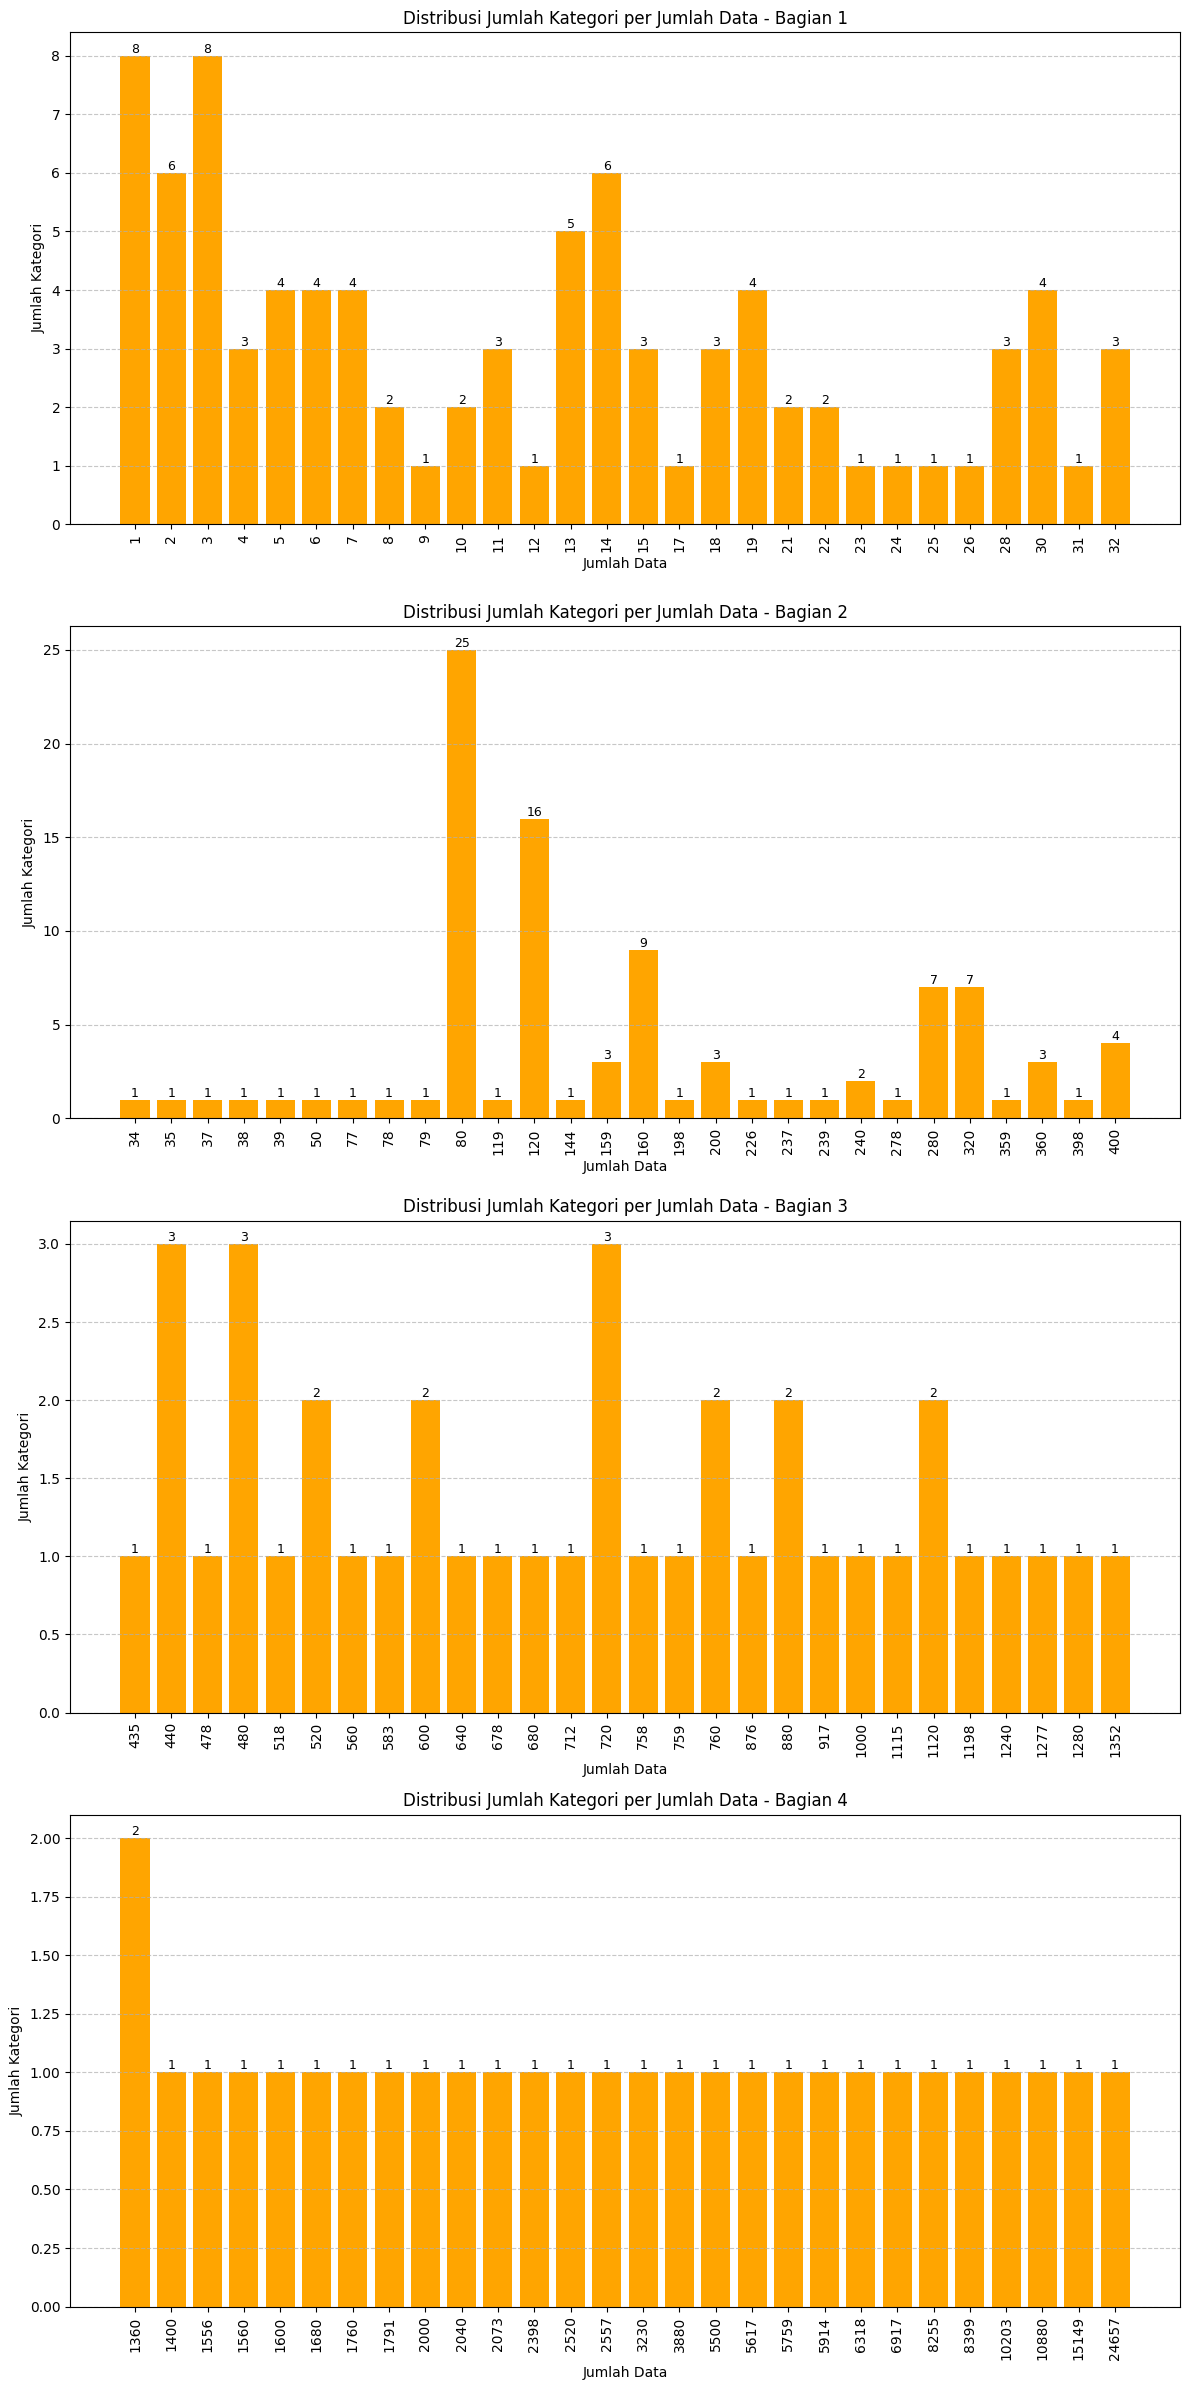

In [ ]:
# Menghitung jumlah data per kategori
value_counts = medicine['sub_category'].value_counts()

# Menghitung distribusi frekuensi data tersebut
# Berapa banyak sub_kategori yang muncul dengan jumlah tertentu
# Contoh: Ada 10 kategori yang masing-masing muncul 3 kali
distribusi = value_counts.value_counts().sort_index()

# Meneentukan jumlah grup untuk memecah distribusi menjadi beberapa bagian agar lebih mudah dibaca
num_groups = 4
group_size = len(distribusi) // num_groups
if len(distribusi) % num_groups != 0:
    num_groups += 1  # Tambah satu grup jika ada sisa

# Membuat subplots
fig, axes = plt.subplots(num_groups, 1, figsize=(12, 6 * num_groups))

# Memastikan axes selalu list meskipun hanya 1 subplot
if num_groups == 1:
    axes = [axes]

# Memvisualisasi setiap grup secara terpisah untuk keterbacaan
for i in range(num_groups):
    start = i * group_size
    end = (i + 1) * group_size
    group_data = distribusi.iloc[start:end]

    # Membuat bar chart untuk grup
    bars = axes[i].bar(range(len(group_data)), group_data.values, color='orange')

    # Menambahkan label angka di atas setiap batang
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}',
                     ha='center', va='bottom', fontsize=9)

    # # Mengatur label sumbu x agar menunjukkan jumlah data per kategori (frekuensinya)
    axes[i].set_xticks(range(len(group_data)))
    axes[i].set_xticklabels(group_data.index, rotation=90)

    # Membuat label dan judul per subplot
    axes[i].set_xlabel('Jumlah Data')
    axes[i].set_ylabel('Jumlah Kategori')
    axes[i].set_title(f'Distribusi Jumlah Kategori per Jumlah Data - Bagian {i + 1}')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Menata agar subplot tidak saling menimpa
plt.tight_layout()
plt.show()

Dari histogram dapat dilihat bahwa terdapat 25 jenis sub category yang memiliki 80 data dan ini merupakan jumlah data yang memiliki sub kategori terbanyak pada histogram. Selain itu, terdapat 25 jenis sub category yang memiliki jumlah data dibawah 5 serta beberapa jenis sub kategori yang memiliki jumlah data mencapai ribuan

### Histogram Jumlah Salt Composition per Jumlah Data

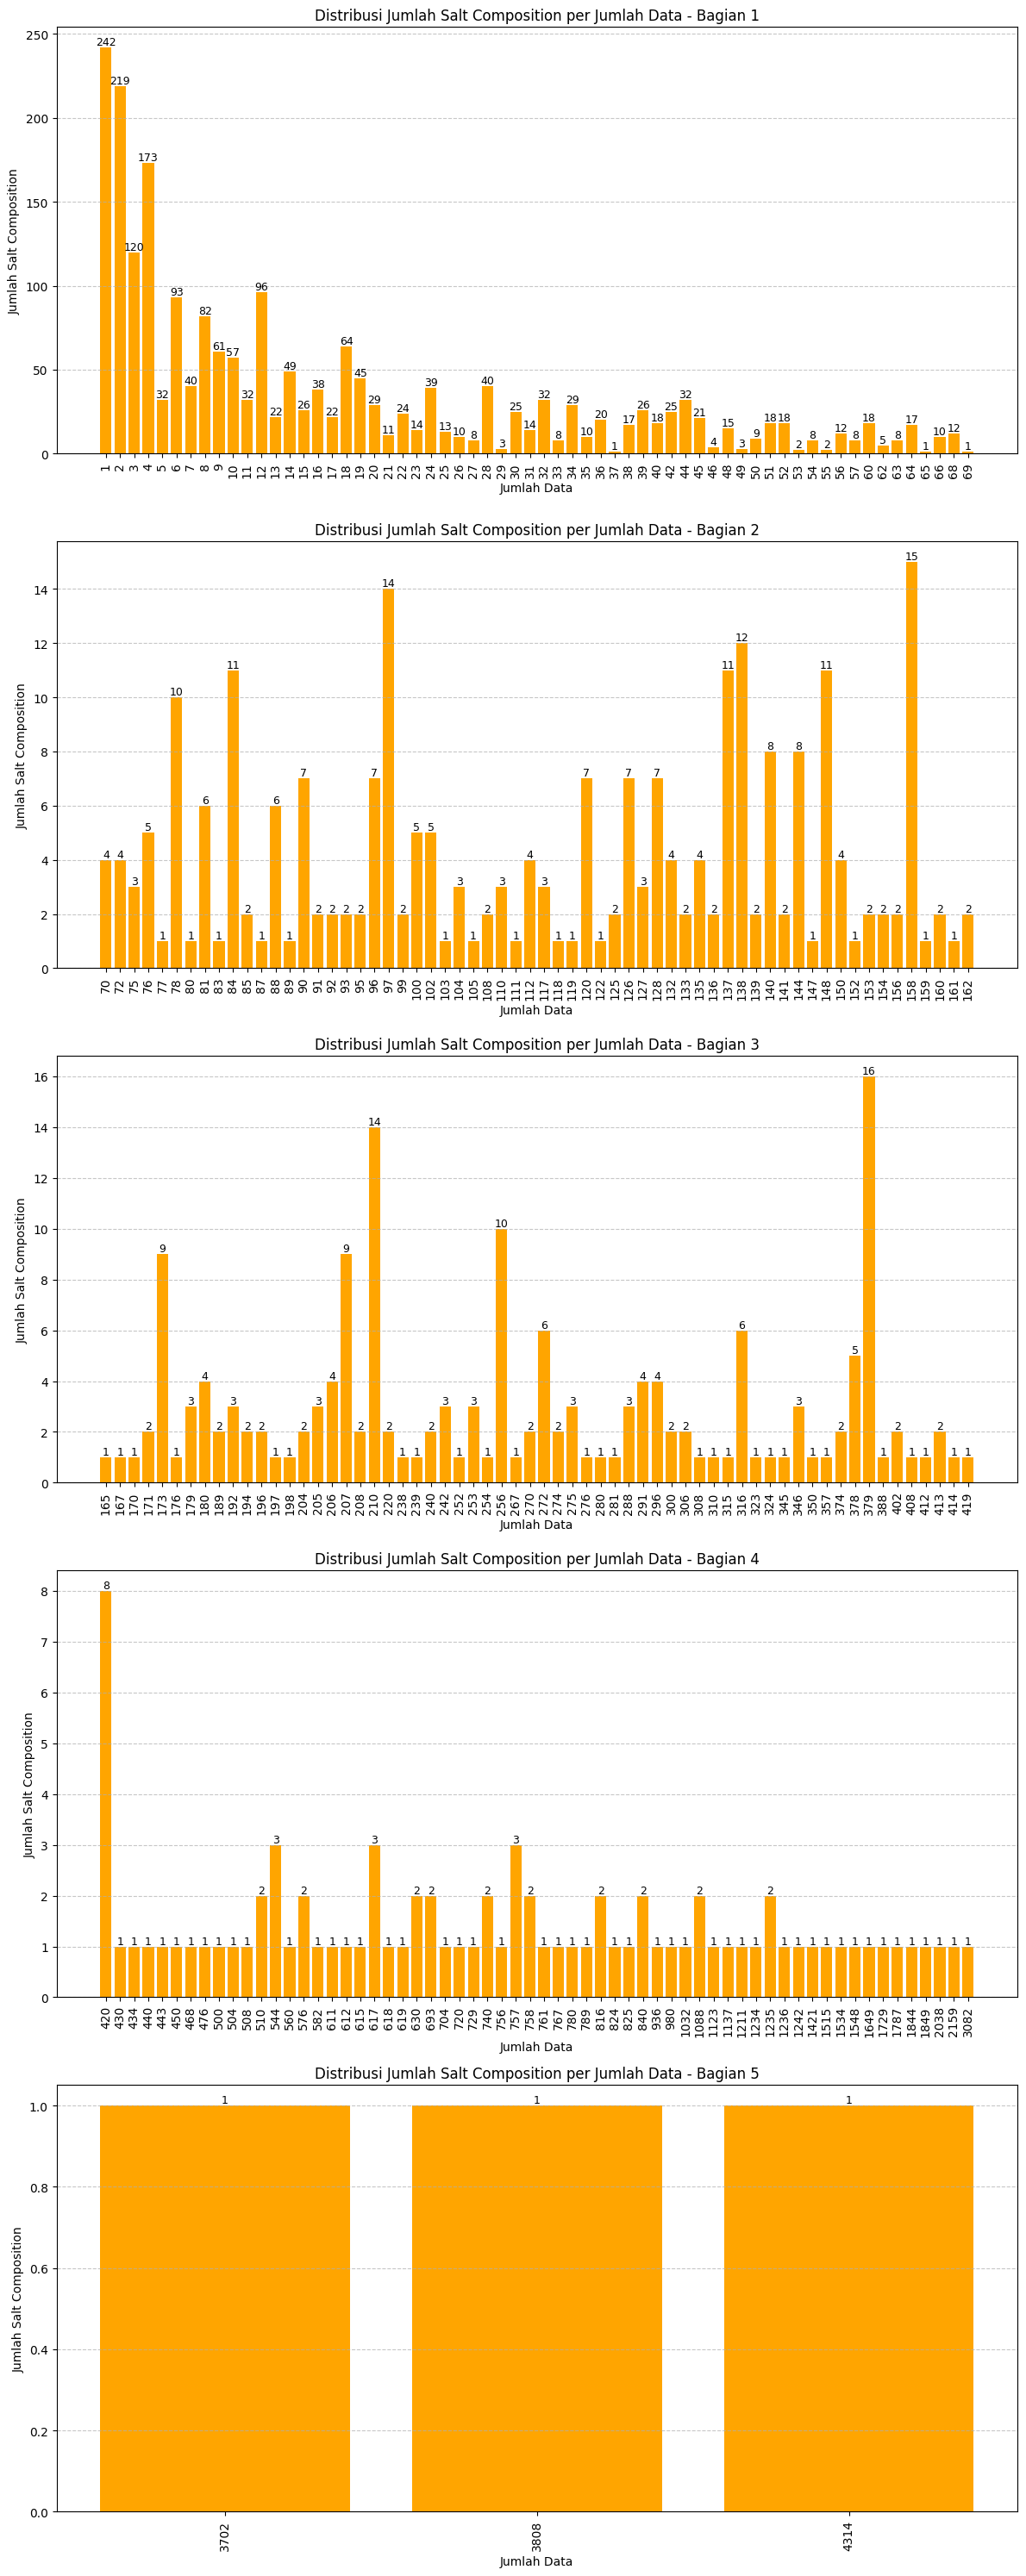

In [ ]:
# Menghitung jumlah data per kategori
value_counts = medicine['salt_composition'].value_counts()

# Menghitung distribusi frekuensi data tersebut
# Berapa banyak sub_kategori yang muncul dengan jumlah tertentu
# Contoh: Ada 10 kategori yang masing-masing muncul 3 kali
distribusi = value_counts.value_counts().sort_index()

# Meneentukan jumlah grup untuk memecah distribusi menjadi beberapa bagian agar lebih mudah dibaca
num_groups = 4
group_size = len(distribusi) // num_groups
if len(distribusi) % num_groups != 0:
    num_groups += 1  # Tambah satu grup jika ada sisa

# Membuat subplots
fig, axes = plt.subplots(num_groups, 1, figsize=(12, 6 * num_groups))

# Memastikan axes selalu list meskipun hanya 1 subplot
if num_groups == 1:
    axes = [axes]

# Memvisualisasi setiap grup secara terpisah untuk keterbacaan
for i in range(num_groups):
    start = i * group_size
    end = (i + 1) * group_size
    group_data = distribusi.iloc[start:end]

    # Membuat bar chart untuk grup
    bars = axes[i].bar(range(len(group_data)), group_data.values, color='orange')

    # Menambahkan label angka di atas setiap batang
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}',
                     ha='center', va='bottom', fontsize=9)

    # # Mengatur label sumbu x agar menunjukkan jumlah data per kategori (frekuensinya)
    axes[i].set_xticks(range(len(group_data)))
    axes[i].set_xticklabels(group_data.index, rotation=90)

    # Membuat label dan judul per subplot
    axes[i].set_xlabel('Jumlah Data')
    axes[i].set_ylabel('Jumlah Salt Composition')
    axes[i].set_title(f'Distribusi Jumlah Salt Composition per Jumlah Data - Bagian {i + 1}')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Menata agar subplot tidak saling menimpa
plt.tight_layout()
plt.show()

Dari histogram dapat dilihat bahwa terdapat 242 jenis salt composition yang memiliki 1 data dan ini merupakan jumlah data yang memiliki jenis salt composition terbanyak pada histogram. Selain itu, terdapat beberapa jenis salt composition yang memiliki jumlah data mencapai ribuan.

### Pemahaman Lanjutan

In [ ]:
# Menghitung distribusi nilai untuk kolom salt_composition
medicine['sub_category'].value_counts()

,count
sub_category,
Cephalosporins,24657
Anti Rheumatics Non Steroidal Systemic,15149
Broad Spectrum Penicillins,10880
Gastroprokinetics,10203
Oral Antidiabetics,8399
...,...
Human Insulin Premix,1
Allergens,1
Expectorants Antitussives Cough Preparations,1


In [ ]:
# Menghitung distribusi nilai untuk kolom sub_category
medicine['salt_composition'].value_counts()

,count
salt_composition,
Cefpodoxime Proxetil (200mg),4314
Amoxycillin (500mg) + Clavulanic Acid (125mg),3808
Cefixime (200mg),3702
Cefuroxime (500mg),3082
Azithromycin (500mg),2159
...,...
Potassium Chloride (15% w/v),1
HUMAN PREMIX (100IU),1
Potassium Chloride (500mg/5ml),1


In [ ]:
# Menampilkan baris dengan nilai sama di 'product_name', 'sub_category', dan 'salt_composition', tetapi berbeda pada 'product_manufactured'

# Memfilter data untuk mendapatkan kombinasi yang memiliki nilai berbeda pada 'product_manufacture'
filtered = medicine.groupby(['product_name', 'sub_category', 'salt_composition']) \
    .filter(lambda x: x['product_manufactured'].nunique() > 1)

# Memilih hanya kolom yang relevan
result_df = filtered[['product_name', 'sub_category', 'salt_composition', 'product_manufactured']]

# Menampilkan hasil sebagai DataFrame
pd.DataFrame(result_df)

,product_name,sub_category,salt_composition,product_manufactured
59418,Bioprim Syrup,Trimethoprim And Similar Formulations,Sulfamethoxazole (200mg) + Trimethoprim (40mg),Zydus Cadila
59437,Bioprim Syrup,Trimethoprim And Similar Formulations,Sulfamethoxazole (200mg) + Trimethoprim (40mg),BIO Ethicals Pharma Limited
59458,Bioprim Syrup,Trimethoprim And Similar Formulations,Sulfamethoxazole (200mg) + Trimethoprim (40mg),Zydus Cadila
59477,Bioprim Syrup,Trimethoprim And Similar Formulations,Sulfamethoxazole (200mg) + Trimethoprim (40mg),BIO Ethicals Pharma Limited
59498,Bioprim Syrup,Trimethoprim And Similar Formulations,Sulfamethoxazole (200mg) + Trimethoprim (40mg),Zydus Cadila
59517,Bioprim Syrup,Trimethoprim And Similar Formulations,Sulfamethoxazole (200mg) + Trimethoprim (40mg),BIO Ethicals Pharma Limited
59538,Bioprim Syrup,Trimethoprim And Similar Formulations,Sulfamethoxazole (200mg) + Trimethoprim (40mg),Zydus Cadila
59557,Bioprim Syrup,Trimethoprim And Similar Formulations,Sulfamethoxazole (200mg) + Trimethoprim (40mg),BIO Ethicals Pharma Limited
68109,Ringer Lactate Infusion,Standard Solutions,Sodium Chloride (0.6gm) + Sodium Lactate (0.32...,Parenteral Drugs India Ltd
68110,Ringer Lactate Infusion,Standard Solutions,Sodium Chloride (0.600gm) + Sodium Lactate (0....,Baxter India Pvt Ltd


Pada tabel diatas, dapat dilihat bahwa terdapat kesamaan product name, sub category, dan salt composition pada obat yang diproduksi pada beberapa manufaktur. Hal ini menunjukkan adanya sejumlah besar produk dengan informasi yang sangat mirip atau identik. Sehingga, data duplikat ini akan dihapus nantinya pada prose data preparation.

In [ ]:
# Mencari baris yang punya kombinasi sama antara product_name, sub_category, dan salt_composition
duplikat_kombinasi = medicine[medicine.duplicated(subset=['product_name', 'sub_category', 'salt_composition'], keep=False)]

# Menampilkan jumlah baris yang memiliki kombinasi duplikat
print(f"Jumlah baris dengan kombinasi duplikat: {len(duplikat_kombinasi)}")

Jumlah baris dengan kombinasi duplikat: 194376


In [ ]:
# Menampilkan baris setelah diurutkan
duplikat_kombinasi.sort_values(by=['product_name', 'sub_category', 'salt_composition']).head(10)

,sub_category,product_name,salt_composition,product_price,product_manufactured,medicine_desc,side_effects,drug_interactions
181137,Systemic Antihistamines,1-AL Tablet,Levocetirizine (5mg),₹24.48,FDC Ltd,1-AL Tablet belongs to a group of medicines ca...,"Sleepiness,Fatigue,Headache,Dryness in mouth","{""drug"": [""Aprepitant"", ""Fosaprepitant"", ""Zafi..."
181177,Systemic Antihistamines,1-AL Tablet,Levocetirizine (5mg),₹24.48,FDC Ltd,1-AL Tablet belongs to a group of medicines ca...,"Sleepiness,Fatigue,Headache,Dryness in mouth","{""drug"": [""Aprepitant"", ""Fosaprepitant"", ""Zafi..."
181217,Systemic Antihistamines,1-AL Tablet,Levocetirizine (5mg),₹24.48,FDC Ltd,1-AL Tablet belongs to a group of medicines ca...,"Sleepiness,Fatigue,Headache,Dryness in mouth","{""drug"": [""Aprepitant"", ""Fosaprepitant"", ""Zafi..."
181255,Systemic Antihistamines,1-AL Tablet,Levocetirizine (5mg),₹24.48,FDC Ltd,1-AL Tablet belongs to a group of medicines ca...,"Sleepiness,Fatigue,Headache,Dryness in mouth","{""drug"": [""Aprepitant"", ""Fosaprepitant"", ""Zafi..."
181295,Systemic Antihistamines,1-AL Tablet,Levocetirizine (5mg),₹24.48,FDC Ltd,1-AL Tablet belongs to a group of medicines ca...,"Sleepiness,Fatigue,Headache,Dryness in mouth","{""drug"": [""Aprepitant"", ""Fosaprepitant"", ""Zafi..."
181334,Systemic Antihistamines,1-AL Tablet,Levocetirizine (5mg),₹24.48,FDC Ltd,1-AL Tablet belongs to a group of medicines ca...,"Sleepiness,Fatigue,Headache,Dryness in mouth","{""drug"": [""Aprepitant"", ""Fosaprepitant"", ""Zafi..."
181374,Systemic Antihistamines,1-AL Tablet,Levocetirizine (5mg),₹24.48,FDC Ltd,1-AL Tablet belongs to a group of medicines ca...,"Sleepiness,Fatigue,Headache,Dryness in mouth","{""drug"": [""Aprepitant"", ""Fosaprepitant"", ""Zafi..."
181414,Systemic Antihistamines,1-AL Tablet,Levocetirizine (5mg),₹24.48,FDC Ltd,1-AL Tablet belongs to a group of medicines ca...,"Sleepiness,Fatigue,Headache,Dryness in mouth","{""drug"": [""Aprepitant"", ""Fosaprepitant"", ""Zafi..."
181453,Systemic Antihistamines,1-AL Tablet,Levocetirizine (5mg),₹24.48,FDC Ltd,1-AL Tablet belongs to a group of medicines ca...,"Sleepiness,Fatigue,Headache,Dryness in mouth","{""drug"": [""Aprepitant"", ""Fosaprepitant"", ""Zafi..."
181493,Systemic Antihistamines,1-AL Tablet,Levocetirizine (5mg),₹24.48,FDC Ltd,1-AL Tablet belongs to a group of medicines ca...,"Sleepiness,Fatigue,Headache,Dryness in mouth","{""drug"": [""Aprepitant"", ""Fosaprepitant"", ""Zafi..."


In [ ]:
# Menghitung jumlah kemunculan tiap kombinasi 'product_name', 'sub_category', dan 'salt_composition'
kombinasi_counts = medicine.groupby(['product_name', 'sub_category', 'salt_composition']).size().reset_index(name='count')

# Mengambil hanya kombinasi yang muncul lebih dari 1 kali
kombinasi_duplikat = kombinasi_counts[kombinasi_counts['count'] > 1]

# Menampilkan jumlah kombinasi duplikat
print(f"Jumlah kombinasi duplikat: {len(kombinasi_duplikat)}")

Jumlah kombinasi duplikat: 6248


In [ ]:
# Menampilkan 5 duplikat teratas berdasarkan jumlah kemunculan
kombinasi_duplikat.sort_values(by='count', ascending=False).head()

,product_name,sub_category,salt_composition,count
7365,Zifi 200 Tablet,Cephalosporins,Cefixime (200mg),619
2880,Gudcef-CV 200 Tablet,Cephalosporins,Cefpodoxime Proxetil (200mg) + Clavulanic Acid...,619
4225,Monocef 1gm Injection,Cephalosporins,Ceftriaxone (1gm),619
6404,Taxim 1gm Injection,Cephalosporins,Cefotaxime (1gm),619
3904,Mahacef 200 Tablet,Cephalosporins,Cefixime (200mg),618


## Data Preparation

### Menghapus Fitur yang Tidak Digunakan

Pada project ini kita berfokus menggunakan 2 fitur pada data yaitu sub category dan salt composition, sehingga fitur seperti product price, product_manufactured, medicine desc, dan drug interactions kan dihapus pada dataset

In [ ]:
# Menghapus kolom-kolom yang tidak digunakan dalam sistem rekomendasi
medicine.drop(
    columns=[
        'product_price',
        'product_manufactured',
        'medicine_desc',
        'drug_interactions',
        'side_effects'
    ],
    inplace=True  # Perubahan langsung diterapkan ke DataFrame tanpa membuat salinan
)

# Menampilkan kolom-kolom yang tersisa setelah proses penghapusan
print(medicine.columns)

Index(['sub_category', 'product_name', 'salt_composition'], dtype='object')


### Mengapus Data Kombinasi *Duplikat*

Data yang dihapus merupkan data yang memiliki nilai sama pada fitur product name, sub category, dan salt composition. Duplikasi data dapat menyebabkan sistem rekomendasi menjadi bias dan tidak efisien. Dengan menghapus data ganda, kita memastikan bahwa model hanya belajar dari informasi yang unik dan relevan, sehingga meningkatkan akurasi rekomendasi.

In [ ]:
# Mengambil kombinasi duplikat berdasarkan 'product_name', 'sub_category', dan 'salt_composition'
duplikat_rows = medicine[medicine.duplicated(subset=['product_name', 'sub_category', 'salt_composition'], keep=False)]

# Menghapus baris-baris  yang telah ditandai sebagai duplikat
medicine_cleaned = medicine.drop(duplikat_rows.index)

# Menampilkan jumlah baris sebelum dan sesudah penghapusan duplikat
print(f"Jumlah baris sebelum duplikat dihapus: {len(medicine)}")
print(f"Jumlah baris setelah duplikat dihapus: {len(medicine_cleaned)}")

Jumlah baris sebelum duplikat dihapus: 195605
Jumlah baris setelah duplikat dihapus: 1229


In [ ]:
medicine_cleaned.head()

,sub_category,product_name,salt_composition
0,Human Insulin Basal,Human Insulatard 40IU/ml Suspension for Injection,Insulin Isophane (40IU)
1,Human Insulin Basal,Insulin 40IU/ml Injection,Insulin Isophane (40IU)
2,Human Insulin Basal,Huminsulin N 40IU/ml Injection,Insulin Isophane (40IU)
3,Human Insulin Basal,Insugen-N 40IU/ml Injection,Insulin Isophane (40IU)
4,Human Insulin Basal,Insulatard 100IU/ml Flexpen,Insulin Isophane (100IU/ml)


In [ ]:
# Menampilkan jumlah nilai unik (unique values) setelah proses penghapusan duplikat

print('Jumlah subkategori setelah drop: ', medicine_cleaned.sub_category.nunique())
print('Jumlah Produk Name setelah drop: ', medicine_cleaned.product_name.nunique())
print('Jumlah Komposisi Obat setelah drop: ', medicine_cleaned.salt_composition.nunique())

Jumlah subkategori setelah drop:  96
Jumlah Produk Name setelah drop:  1226
Jumlah Komposisi Obat setelah drop:  451


### Memfilter Data

Sub kategori yang memilki data dibawah 5 akan dihapus. Jumlah data yang terlalu sedikit pada suatu kategori membuat model sulit belajar pola yang kuat. Hal ini bisa menyebabkan overfitting atau hasil rekomendasi yang tidak akurat karena minimnya representasi dat

In [ ]:
# Menghitung jumlah data (frekuensi) untuk setiap sub-kategori
value_counts = medicine_cleaned['sub_category'].value_counts()

# Mengitung jumlah sub-kategori yang memiliki data kurang dari 5 (jarang muncul)
jumlah_kategori_dibawah_5 = (value_counts < 5).sum()
print(f"Jumlah katergori dengan jumlah datanya dibawah 5 : {jumlah_kategori_dibawah_5}")

Jumlah katergori dengan jumlah datanya dibawah 5 : 29


In [ ]:
# Menghitung jumlah data per subkategori
subcat_counts = medicine_cleaned['sub_category'].value_counts()

# Mengambil hanya subkategori yang jumlah datanya > 4
valid_subcats = subcat_counts[subcat_counts > 4].index

# Memfilter dataframe untuk hanya menyertakan subkategori yang valid (jumlah data > 4)
medicine_filtered = medicine_cleaned[medicine_cleaned['sub_category'].isin(valid_subcats)].copy()

# Mengecek hasil jumlah baris sebelum dan sesudah filter
print(f"Jumlah baris sebelum filter: {len(medicine_cleaned)}")
print(f"Jumlah baris sesudah filter: {len(medicine_filtered)}")

Jumlah baris sebelum filter: 1229
Jumlah baris sesudah filter: 1169


In [ ]:
# Menampilkan jumlah nilai unik (unique values) setelah proses filtering

print(f"Jumlah data: {len(medicine)}")
print(f"Jumlah data sesudah drop: {len(medicine_cleaned)}")
print(f"Jumlah data sesudah filter: {len(medicine_filtered)}")

Jumlah data: 195605
Jumlah data sesudah drop: 1229
Jumlah data sesudah filter: 1169


In [ ]:
# Menampilkan jumlah nilai unik (unique values) untuk setiap tahapan pada fitur sub_category dan salt_composition

print('Jumlah Sub Kategori : ', medicine.sub_category.nunique())
print('Jumlah Salt Composition : ', medicine.salt_composition.nunique())
print('Jumlah Sub Kategori setelah drop: ', medicine_cleaned.sub_category.nunique())
print('Jumlah Salt Composition setelah drop: ', medicine_cleaned.salt_composition.nunique())
print('Jumlah Sub Kategori setelah filter: ', medicine_filtered.sub_category.nunique())
print('Jumlah Salt Composition setelah filter: ', medicine_filtered.salt_composition.nunique())

Jumlah Sub Kategori :  252
Jumlah Salt Composition :  2663
Jumlah Sub Kategori setelah drop:  96
Jumlah Salt Composition setelah drop:  451
Jumlah Sub Kategori setelah filter:  67
Jumlah Salt Composition setelah filter:  399


In [ ]:
# Mereset index pada dataframe setelah filter, tanpa menambah kolom 'index'

medicine_filtered = medicine_filtered.reset_index(drop=True)

In [ ]:
medicine_filtered.head()

,sub_category,product_name,salt_composition
0,Human Insulin Basal,Human Insulatard 40IU/ml Suspension for Injection,Insulin Isophane (40IU)
1,Human Insulin Basal,Insulin 40IU/ml Injection,Insulin Isophane (40IU)
2,Human Insulin Basal,Huminsulin N 40IU/ml Injection,Insulin Isophane (40IU)
3,Human Insulin Basal,Insugen-N 40IU/ml Injection,Insulin Isophane (40IU)
4,Human Insulin Basal,Insulatard 100IU/ml Flexpen,Insulin Isophane (100IU/ml)


### Normalisasi Data

Normalisasi data dilakukan pada Fitur Sub Category dan Salt Composition. Normalsisai dilakukan dengan cara Mengubah huruf menjadi huruf kecil (lowercase) dan menghapus karakter khusus seperti tanda baca atau simbol. Normalisasi membantu menyamakan format penulisan sehingga data yang secara semantik sama tapi tertulis berbeda dapat dikenali sebagai satu entitas.

In [ ]:
# Menstandarisasi kolom 'sub_category':
# - Mengubah semua huruf menjadi huruf kecil (lowercase)
# - Menghapus spasi kosong di awal/akhir string

medicine_filtered['sub_category'] = medicine_filtered['sub_category'].str.strip().str.lower()  # Menstandarisasi ke lowercase dan menghapus spasi ekstra

In [ ]:
# Fungsi untuk menormalisasi komposisi garam (salt composition)
def normalize_salt_composition(comp):

    """
    Menormalisasi string komposisi garam obat (salt composition) agar konsisten untuk perbandingan.

    Langkah-langkah:
    - Pisahkan komponen jika terdiri dari beberapa zat aktif yang digabung dengan '+'
    - Hilangkan teks dalam tanda kurung (misalnya dosis atau bentuk sediaan)
    - Ubah ke huruf kecil dan hapus spasi berlebih
    - Urutkan komponen secara alfabetis agar formatnya konsisten meskipun urutan awal berbeda

    Parameters:
    - comp: string komposisi garam, misalnya "Paracetamol (500mg) + Caffeine (30mg)"

    Returns:
    - Normalized string: "caffeine + paracetamol"
    """

    components = [c.split('(')[0].strip().lower() for c in comp.split('+')]
    return ' + '.join(sorted(components))

In [ ]:
# Terapkan normalisasi ke kolom 'salt_composition' dan simpan ke kolom baru 'normalized_salt'
medicine_filtered['normalized_salt'] = medicine_filtered['salt_composition'].apply(normalize_salt_composition)

### Menggabungkan Fitur

Menggabungkan Fitur Sub Category dan Salt Composition menjadi Fitur Baru. Sebelum modelling , akan dibuat fitur baru yang merupakan gabungan dari sub category dan salt composition yang telah dinormalisasi. Menggabungkan dua fitur ini membantu membentuk representasi yang lebih lengkap dari setiap obat.

In [ ]:
# Menggabungkan fitur 'sub_category' dan 'normalized_salt' untuk membuat representasi teks gabungan
medicine_filtered['combined_text'] = medicine_filtered['sub_category'] + ' ' + medicine_filtered['normalized_salt']

### Pembuatan Matriks TD-*IDF*

Setelah fitur gabungan terbentuk, dilakukan proses transformasi teks menjadi representasi numerik menggunakan teknik TF-IDF (Term Frequency-Inverse Document Frequency). Teknik ini digunakan untuk mengukur pentingnya suatu kata dalam sebuah dokumen relatif terhadap kumpulan dokumen lainnya. Matriks ini memungkinkan sistem rekomendasi menghitung tingkat kemiripan antar obat menggunakan ukuran seperti cosine similarity

In [ ]:
# Inisialisasi vectorizer untuk menghitung bobot TF-IDF dari teks gabungan
vectorizer = TfidfVectorizer()

# Transformasi teks menjadi matriks TF-IDF
tfidf_matrix = vectorizer.fit_transform(medicine_filtered['combined_text'])

In [ ]:
# Melihat ukuran matriks TF-IDF: (jumlah produk, jumlah fitur unik)
tfidf_matrix.shape

(1169, 392)

In [ ]:
# Melihat bentuk padat dari matriks TF-IDF
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Membuat DataFrame dari matriks TF-IDF untuk melihat bobot setiap kata pada beberapa produk secara acak

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=vectorizer.get_feature_names_out(),
    index=medicine_filtered['product_name']
).sample(10, axis=0).sample(10, axis=1).round(2) # Memilih 5 produk secara acak dan 10 kata fitur

,fluocinolone,opthalmological,rotavirus,dependence,combined,of,specific,fosfestrol,alanyl,cardiac
product_name,,,,,,,,,,
Lac Syrup,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aprostat 500000IU Injection,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Stamaril Vaccine,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Topicaine Eye Drop,0.0,0.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apidra Solostar 300IU/ml Injection,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Neximetol-G Infusion,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Tret 10mg Capsule,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rofaday Tablet,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Scarbact Plus Ointment,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Perhitungan cosine similarity antar produk

Setelah matriks TF-IDF terbentuk, langkah berikutnya adalah menghitung cosine similarity antara vektor-vektor TF-IDF dari setiap produk obat. Ini digunakan untuk merepresentasikan seberapa mirip dua obat tersebut berdasarkan kombinasi sub_category dan salt_composition. engan menggunakan metrik ini, sistem dapat menentukan obat-obat mana yang memiliki kemiripan konten paling tinggi dan merekomendasikan obat pengganti yang relevan sesuai kebutuhan pengguna.

In [ ]:
# Mengitung cosine similarity antar produk
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Membuat DataFrame untuk menampilkan hubungan antara produk dan fitur
cosine_sim_df = pd.DataFrame(cosine_similarities, columns=medicine_filtered['product_name'], index=medicine_filtered['product_name'])

# Menampilkan matriks hubungan
print('Shape:', cosine_sim_df.shape)
cosine_sim_df.sample(10, axis=1).sample(7, axis=0).round(2)

Shape: (1169, 1169)


product_name,Epalridase 50mg Tablet,TTCab Tablet,Rotavac Oral Vaccine,Fluvir 75mg Capsule,Prostin VR Paediatric Injection,Cerebol 60mg/800mg/5mg Tablet,Defrijet 500 Tablet,Thyrodip 5mg Tablet,Alkopex Oral Solution,Albumed Infusion
product_name,,,,,,,,,,
Sentrane 25mg Capsule,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0
Naltreat Tablet,0.39,0.00,0.0,0.11,0.0,0.0,0.00,0.00,0.0,0.0
Balacol 750mg Capsule,0.00,0.00,0.0,0.07,0.0,0.0,0.13,0.08,0.0,0.0
Olsivir Capsule,0.12,0.00,0.0,1.00,0.0,0.0,0.00,0.07,0.0,0.0
Botroclot Topical Solution,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0
Reliseal Kit,0.00,0.13,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0
Lifepill 2A 5mg/10mg Capsule,0.00,0.14,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0


## Modeling

Teknik yang digunakan untuk membangun sistem rekomendasi obat perngganti adalah _content-based filtering_. _Content-based filtering_ digunakan dalam sistem rekomendasi untuk menyarankan item kepada pengguna berdasarkan kesamaan atribut atau fitur yang ada pada item tersebut. Teknik ini cocok untuk rekomendasi pengganti obat, di mana sistem menganalisis karakteristik obat utama, seperti kandungan zat aktif, indikasi, dan kategori, lalu mencocokkannya dengan obat lain yang memiliki fitur serupa. Dengan cara ini, sistem dapat memberikan rekomendasi obat pengganti yang relevan dan sesuai kebutuhan. Penerapan teknik ini mempercepat dan mempermudah pencarian obat pengganti yang tepat, sekaligus mengurangi risiko kesalahan pengobatan akibat pemilihan alternatif obat yang tidak tepat.


### Pembuatan Fungsi Sistem Rekomendasi

Pada bagain ini, dibuat fungsi yang digunakan untuk merekomendasikan obat-obatan yang mirip berdasarkan kemiripan teks, dengan memanfaatkan matriks TF-IDF dan perhitungan cosine similarity. Fungsi ini menerima nama produk yang ingin dicari rekomendasinya, matriks TF-IDF dari fitur obat, DataFrame berisi data obat, serta jumlah obat mirip (top_n) yang ingin direkomendasikan.

In [ ]:
def recommend_similar_meds(product_name, tfidf_matrix, df, top_n=10):

    """
    Memberikan rekomendasi obat yang mirip berdasarkan kemiripan teks (TF-IDF + Cosine Similarity).

    Parameters:
    - product_name: nama produk obat yang ingin dicari rekomendasinya
    - tfidf_matrix: matriks hasil transformasi TF-IDF dari deskripsi atau fitur obat
    - df: DataFrame berisi data obat (harus sesuai dengan tfidf_matrix)
    - top_n: jumlah obat mirip yang ingin direkomendasikan

    Returns:
    - DataFrame berisi top_n obat yang paling mirip (nama produk, sub kategori, dan komposisi garam)
    """

    # Mencari index produk yang cocok dengan nama yang diberikan
    idx = medicine_filtered[medicine_filtered['product_name'] == product_name].index[0]

    # Mengambil indeks produk dengan similarity tertinggi, kecuali dirinya sendiri
    similar_indices = cosine_similarities[idx].argsort()[-top_n-1:-1][::-1]

    # Mengammbil dan kembalikan data produk mirip beserta informasi relevan
    return medicine_filtered.iloc[similar_indices][['product_name', 'sub_category', 'salt_composition']]


In [ ]:
# Menampilkan dataframe obat yang ingin digantik
medicine_filtered[medicine_filtered['product_name'] == 'Natflu 75mg Capsule'][['product_name', 'sub_category', 'salt_composition']]

,product_name,sub_category,salt_composition
139,Natflu 75mg Capsule,anti flu drugs,Oseltamivir Phosphate (75mg)


In [ ]:
# Contoh penggunaan fungsi:

recommend_similar_meds("Natflu 75mg Capsule", tfidf_matrix, medicine_filtered, top_n=5)

,product_name,sub_category,salt_composition
134,Antiflu 75mg Capsule,anti flu drugs,Oseltamivir Phosphate (75mg)
135,Olsivir Capsule,anti flu drugs,Oseltamivir Phosphate (75mg)
136,Fluvia 75mg Capsule,anti flu drugs,Oseltamivir Phosphate (75mg)
143,Mcosvir Syrup,anti flu drugs,Oseltamivir Phosphate (12mg/ml)
142,Mcosvir 75mg Capsule,anti flu drugs,Oseltamivir Phosphate (75mg)


**bold text**## Evaluation

Pada model _content-based filtering_, metrik evaluasi yang digunakan adalah **precision** atau presisi. Presisi mengukur sejauh mana model berhasil mengklasifikasikan item relevan di antara semua prediksi positif yang dihasilkan. Dalam sistem rekomendasi, presisi mengukur seberapa relevan item yang direkomendasikan dengan preferensi pengguna. Metrik ini dihitung dengan membandingkan jumlah item relevan yang direkomendasikan dengan total item yang direkomendasikan.

Pemilihan presisi sangat relevan untuk proyek ini karena tujuan sistem adalah memberikan rekomendasi obat pengganti yang tepat berdasarkan kesamaan kategori dan komposisi. Fokus pada presisi memastikan bahwa rekomendasi yang diberikan tidak hanya banyak, tetapi juga akurat dan sesuai dengan kebutuhan pengguna, mengurangi kemungkinan memberikan saran yang tidak relevan.


### Fungsi Penentuan Ground Truth

Fungsi ini digunakan untuk mencari produk obat pengganti yang relevan berdasarkan kesamaan *sub category* dan *salt composition*. Fungsi ini berguna sebagai *ground truth* untuk mengevaluasi hasil rekomendasi yang digunakan sebagai pembanding untuk hasil rekomendasi yang dihasilkan oleh sistem


In [ ]:
def get_relevant_based_on_both(product_name, df):
    """
    Mengambil daftar produk relevan berdasarkan kesamaan sub kategori dan komposisi (salt composition).

    Parameter:
    - product_name: nama produk yang ingin dicari padanannya
    - df: DataFrame yang berisi data produk (harus mengandung kolom 'product_name', 'sub_category', dan 'normalized_salt')

    Fungsi ini akan mengembalikan daftar produk lain yang memiliki:
    - sub kategori yang sama
    - komposisi garam (salt) yang sama
    - nama produk yang berbeda (tidak mengembalikan dirinya sendiri)

    Jika produk tidak ditemukan atau terjadi error, maka akan mengembalikan list kosong.
    """
    try:
        # Ambil satu baris data dari DataFrame yang sesuai dengan nama produk yang diberikan
        prod = df[df['product_name'] == product_name].iloc[0]

        # Ambil nilai sub kategori dan salt composition dari produk tersebut
        sub_cat = prod['sub_category']
        salt = prod['normalized_salt']

        # Cari produk lain yang memiliki sub kategori dan salt yang sama, tetapi bukan produk itu sendiri
        relevant = df[
            (df['sub_category'] == sub_cat) &
            (df['normalized_salt'] == salt) &
            (df['product_name'] != product_name)
        ]['product_name'].tolist()

        return relevant

    except:
        # Jika terjadi kesalahan (misalnya produk tidak ditemukan), kembalikan list kosong
        return []

### Fungsi Menghitung Presisi

Pada bagian ini akan dibuat 2 jenis fungsi yaitu :

Fungsi precision_at_k menghitung Precision@K, yaitu proporsi item relevan dari K rekomendasi teratas. Fungsi ini membandingkan daftar rekomendasi dengan data relevan (ground truth) dan menghitung seberapa banyak rekomendasi yang benar di antara K item pertama.

Fungsi evaluate_precision_at_k menghitung Precision@K untuk semua produk dalam dataset. Fungsi ini menerima rekomendasi dan data relevan untuk tiap produk, lalu mengembalikan rata-rata precision keseluruhan serta detail precision untuk setiap produk.

In [ ]:
# Fungsi untuk menghitung Precision@K
def precision_at_k(recommended, relevant, k=5):
    """
    Menghitung Precision@K.
    Precision@K adalah rasio item yang relevan di antara K item yang direkomendasikan teratas.

    Parameters:
    - recommended: list item yang direkomendasikan
    - relevant: set item yang dianggap relevan (ground truth)
    - k: jumlah item teratas yang akan dievaluasi

    Returns:
    - Precision@K (float)
    """
    recommended = recommended[:k]
    recommended_set = set(recommended)
    relevant_set = set(relevant)

    # Precision = Relevant in top-K / Total in top-K
    return len(recommended_set & relevant_set) / k if k > 0 else 0.0


# Fungsi utama untuk evaluasi precision dari semua produk
def evaluate_precision_at_k(all_recommendations, all_relevant, k=5):
    """
    Mengevaluasi Precision@K untuk semua produk yang diuji.

    Parameters:
    - all_recommendations: dictionary {produk: list rekomendasi}
    - all_relevant: dictionary {produk: set item relevan}
    - k: jumlah item teratas yang dipertimbangkan

    Returns:
    - Rata-rata precision semua produk
    - Detail hasil evaluasi per produk
    """
    precision_scores = []
    recommendation_details = {}

    for product in all_recommendations:
        recommended = all_recommendations[product]
        relevant = all_relevant.get(product, set())

        precision = precision_at_k(recommended, relevant, k)

        # Simpan detail evaluasi untuk setiap produk
        recommendation_details[product] = {
            'recommended': recommended[:k],
            'relevant': list(relevant),
            'precision_at_k': precision
        }

        precision_scores.append(precision)

    # Hitung rata-rata precision dari seluruh produk
    avg_precision = np.mean(precision_scores)

    return avg_precision, recommendation_details

### Perhitungan Presisi

Bagian ini akan melakukan pengujian dan evaluasi sistem rekomendasi obat pengganti berbasis content-based filtering. Pertama, daftar produk yang akan diuji didefinisikan di products_to_test. Selanjutnya, ground truth untuk tiap produk dibuat dengan memanggil fungsi get_relevant_based_on_both untuk mendapatkan daftar produk relevan berdasarkan sub category dan salt composition.

Setelah itu, untuk setiap produk, sistem rekomendasi dipanggil melalui fungsi recommend_similar_meds yang menghasilkan daftar 5 obat pengganti teratas. Hasil rekomendasi tersebut disimpan dalam all_recommendations.

Kemudian, fungsi evaluate_precision_at_k digunakan untuk menghitung rata-rata Precision@5 dari semua produk, yaitu seberapa tepat rekomendasi dalam 5 teratas dibandingkan ground truth. Terakhir, hasil evaluasi beserta rekomendasi dan data relevan untuk tiap produk ditampilkan secara terperinci.

In [ ]:
# Daftar produk yang akan diuji sistem rekomendasinya
products_to_test = ["Natflu 75mg Capsule", "Huminsulin N 40IU/ml Injection", "Alrista Plus Tablet SR"]

# Ground truth: produk relevan ditentukan berdasarkan sub kategori (bisa juga dengan salt composition)
ground_truth = {
    "Natflu 75mg Capsule": set(get_relevant_based_on_both("Natflu 75mg Capsule", medicine_filtered)),
    "Huminsulin N 40IU/ml Injection": set(get_relevant_based_on_both("Huminsulin N 40IU/ml Injection", medicine_filtered)),
    "Alrista Plus Tablet SR": set(get_relevant_based_on_both("Alrista Plus Tablet SR", medicine_filtered)),
}

# Hitung rekomendasi obat untuk setiap produk
all_recommendations = {}
for product in products_to_test:
    try:
        # Panggil fungsi sistem rekomendasi (misalnya berbasis TF-IDF)
        recs = recommend_similar_meds(product, tfidf_matrix, medicine_filtered, top_n=5)
        all_recommendations[product] = recs['product_name'].tolist()
    except Exception as e:
        print(f"Error recommending for {product}: {e}")
        all_recommendations[product] = []

# Evaluasi sistem rekomendasi menggunakan Precision@K
avg_precision, recommendation_details = evaluate_precision_at_k(all_recommendations, ground_truth, k=5)

# Menampilkan hasil evaluasi
print(f"Average Precision@5: {avg_precision:.4f}")
print("\nRekomendasi Obat Beserta Evaluasi Precision@5:\n")

for product, details in recommendation_details.items():
    print(f"Produk: {product}")
    print(f"Rekomendasi (Top-5): {details['recommended']}")
    print(f"Relevansi: {details['relevant']}")
    print(f"Precision@5: {details['precision_at_k']:.4f}")
    print("-" * 50)

Average Precision@5: 1.0000

Rekomendasi Obat Beserta Evaluasi Precision@5:

Produk: Natflu 75mg Capsule
Rekomendasi (Top-5): ['Antiflu 75mg Capsule', 'Olsivir Capsule', 'Fluvia 75mg Capsule', 'Mcosvir Syrup', 'Mcosvir 75mg Capsule']
Relevansi: ['Olsivir Capsule', 'Fluvia 75mg Capsule', 'Antiflu 12mg/ml Syrup', 'Antiflu 75mg Capsule', 'Mcosvir 75mg Capsule', 'Starflu 75mg Capsule', 'Fluvir Oral Suspension', 'Fluvir 75mg Capsule', 'Mcosvir Syrup', 'Fluvir 30mg Tablet']
Precision@5: 1.0000
--------------------------------------------------
Produk: Huminsulin N 40IU/ml Injection
Rekomendasi (Top-5): ['Univia N 40IU/ml Injection', 'Humanext N 40IU/ml Injection', 'Insulatard 100IU/ml Solution for Injection', 'Human Zinulin 40IU/ml Injection', 'Recosulin N 100IU Injection']
Relevansi: ['Iletin NPH 40IU/ml Injection', 'Huminsulin N 100IU/ml Injection', 'Insulatard 100IU/ml Solution for Injection', 'Insucare N 40IU/ml Injection', 'Human Zinulin 40IU/ml Injection', 'Humanext N 40IU/ml Injection

Dari hasil evaluasi dapat dilihat bahwa  sistem berhasil merekomendasikan lima obat yang relevan berdasarkan kesamaan kategori dan komposisi.
Untuk **Natflu 75mg Capsule**, kelima rekomendasi yang diberikan memiliki relevansi yang sama, menghasilkan **precision\@5** sebesar 1.0, yang berarti semua rekomendasi relevan. Hal yang sama juga berlaku untuk **Huminsulin N 40IU/ml Injection** dan **Alrista Plus Tablet SR**, dengan **precision\@5** masing-masing mencapai 1.0, menunjukkan bahwa semua rekomendasi yang diberikan sesuai dengan kebutuhan dan preferensi pengguna.

Secara keseluruhan, hasil ini menunjukkan bahwa sistem rekomendasi berbasis **content-based filtering** memberikan rekomendasi yang sangat akurat, dengan **precision\@5** mencapai nilai sempurna (1.0) untuk setiap produk.

## Catatan Reviewer Sebelumnya

### Notebook Documentation

#### Terdapat variabel yang tidak didefinisikan sebelumnya.

Jika ada variabel yang belum didefinisikan, program akan menghasilkan error saat dijalankan ulang dan output yang muncul bisa jadi tidak valid. Sebaiknya periksa dan lengkapi definisi setiap variabel sebelum menjalankan kembali.

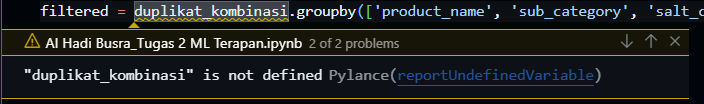

#### Memberikan dokumentasi pada setiap baris kode atau fungsi kode menggunakan markdown/text cell pada Notebook

Penjelasan yang dimaksud meliputi:
* Penjelasan terkait proses yang dilakukan.
Contoh: Terdapat missing value pada dataset maka kamu perlu menyinggung metode apa yang digunakan untuk mengisi nilai kosong tersebut.
* Penjelasan terkait hasil dari proses yang telah dijalankan.
Contoh: Kamu telah melakukan eksplorasi data maka kamu perlu menyinggung insight apa yang didapatkan dari hasil eksplorasinya tersebut.

### Data Preparation

Kamu belum menuliskan seluruh tahapan data preparation yang kamu lakukan, silahkan tambahkan tahapan TFIDF dan sebagainya. Pastikan tahapan pemrosesan data urut dan lengkap sesuai yang ada pada notebook.